In [1]:
cd

/Users/keithwalcott


In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
uninfected = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-uninfected-1_counts.csv')
sample_4u8c_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio1-1_counts.csv')
sample_4u8c_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio2-1_counts.csv')
sample_4u8c_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio2-2_counts.csv')
sample_Both_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Both_bio1-1_counts.csv')
sample_Both_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Both_bio2-1_counts.csv')
sample_C7_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio1-1_counts.csv')
sample_C7_B1T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio1-2_counts.csv')
sample_C7_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio2-1_counts.csv')
sample_DMSO_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio1-1_counts.csv')
sample_DMSO_B1T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio1-2_counts.csv')
sample_DMSO_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio2-1_counts.csv')
sample_DMSO_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio2-2_counts.csv')
sample_DMSO_B1_1X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_1X-1_counts.csv')
sample_DMSO_B1_5X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_5X-1_counts.csv')
sample_DMSO_B1_10X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_10X-1_counts.csv')
sample_DMSO_B2_1X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_1X-1_counts.csv')
sample_DMSO_B2_5X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_5X-1_counts.csv')
sample_DMSO_B2_10X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_10X-1_counts.csv')

In [4]:
sample_names = [
    "uninfected", 
    "sample_4u8c_B1T1", "sample_4u8c_B2T1", "sample_4u8c_B2T2",
    "sample_Both_B1T1", "sample_Both_B2T1",
    "sample_C7_B1T1", "sample_C7_B1T2", "sample_C7_B2T2",
    "sample_DMSO_B1T1", "sample_DMSO_B1T2", "sample_DMSO_B2T1", "sample_DMSO_B2T2",
    "sample_DMSO_B1_1X", "sample_DMSO_B1_5X", "sample_DMSO_B1_10X",
    "sample_DMSO_B2_1X", "sample_DMSO_B2_5X", "sample_DMSO_B2_10X"
]

/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keithwalcott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

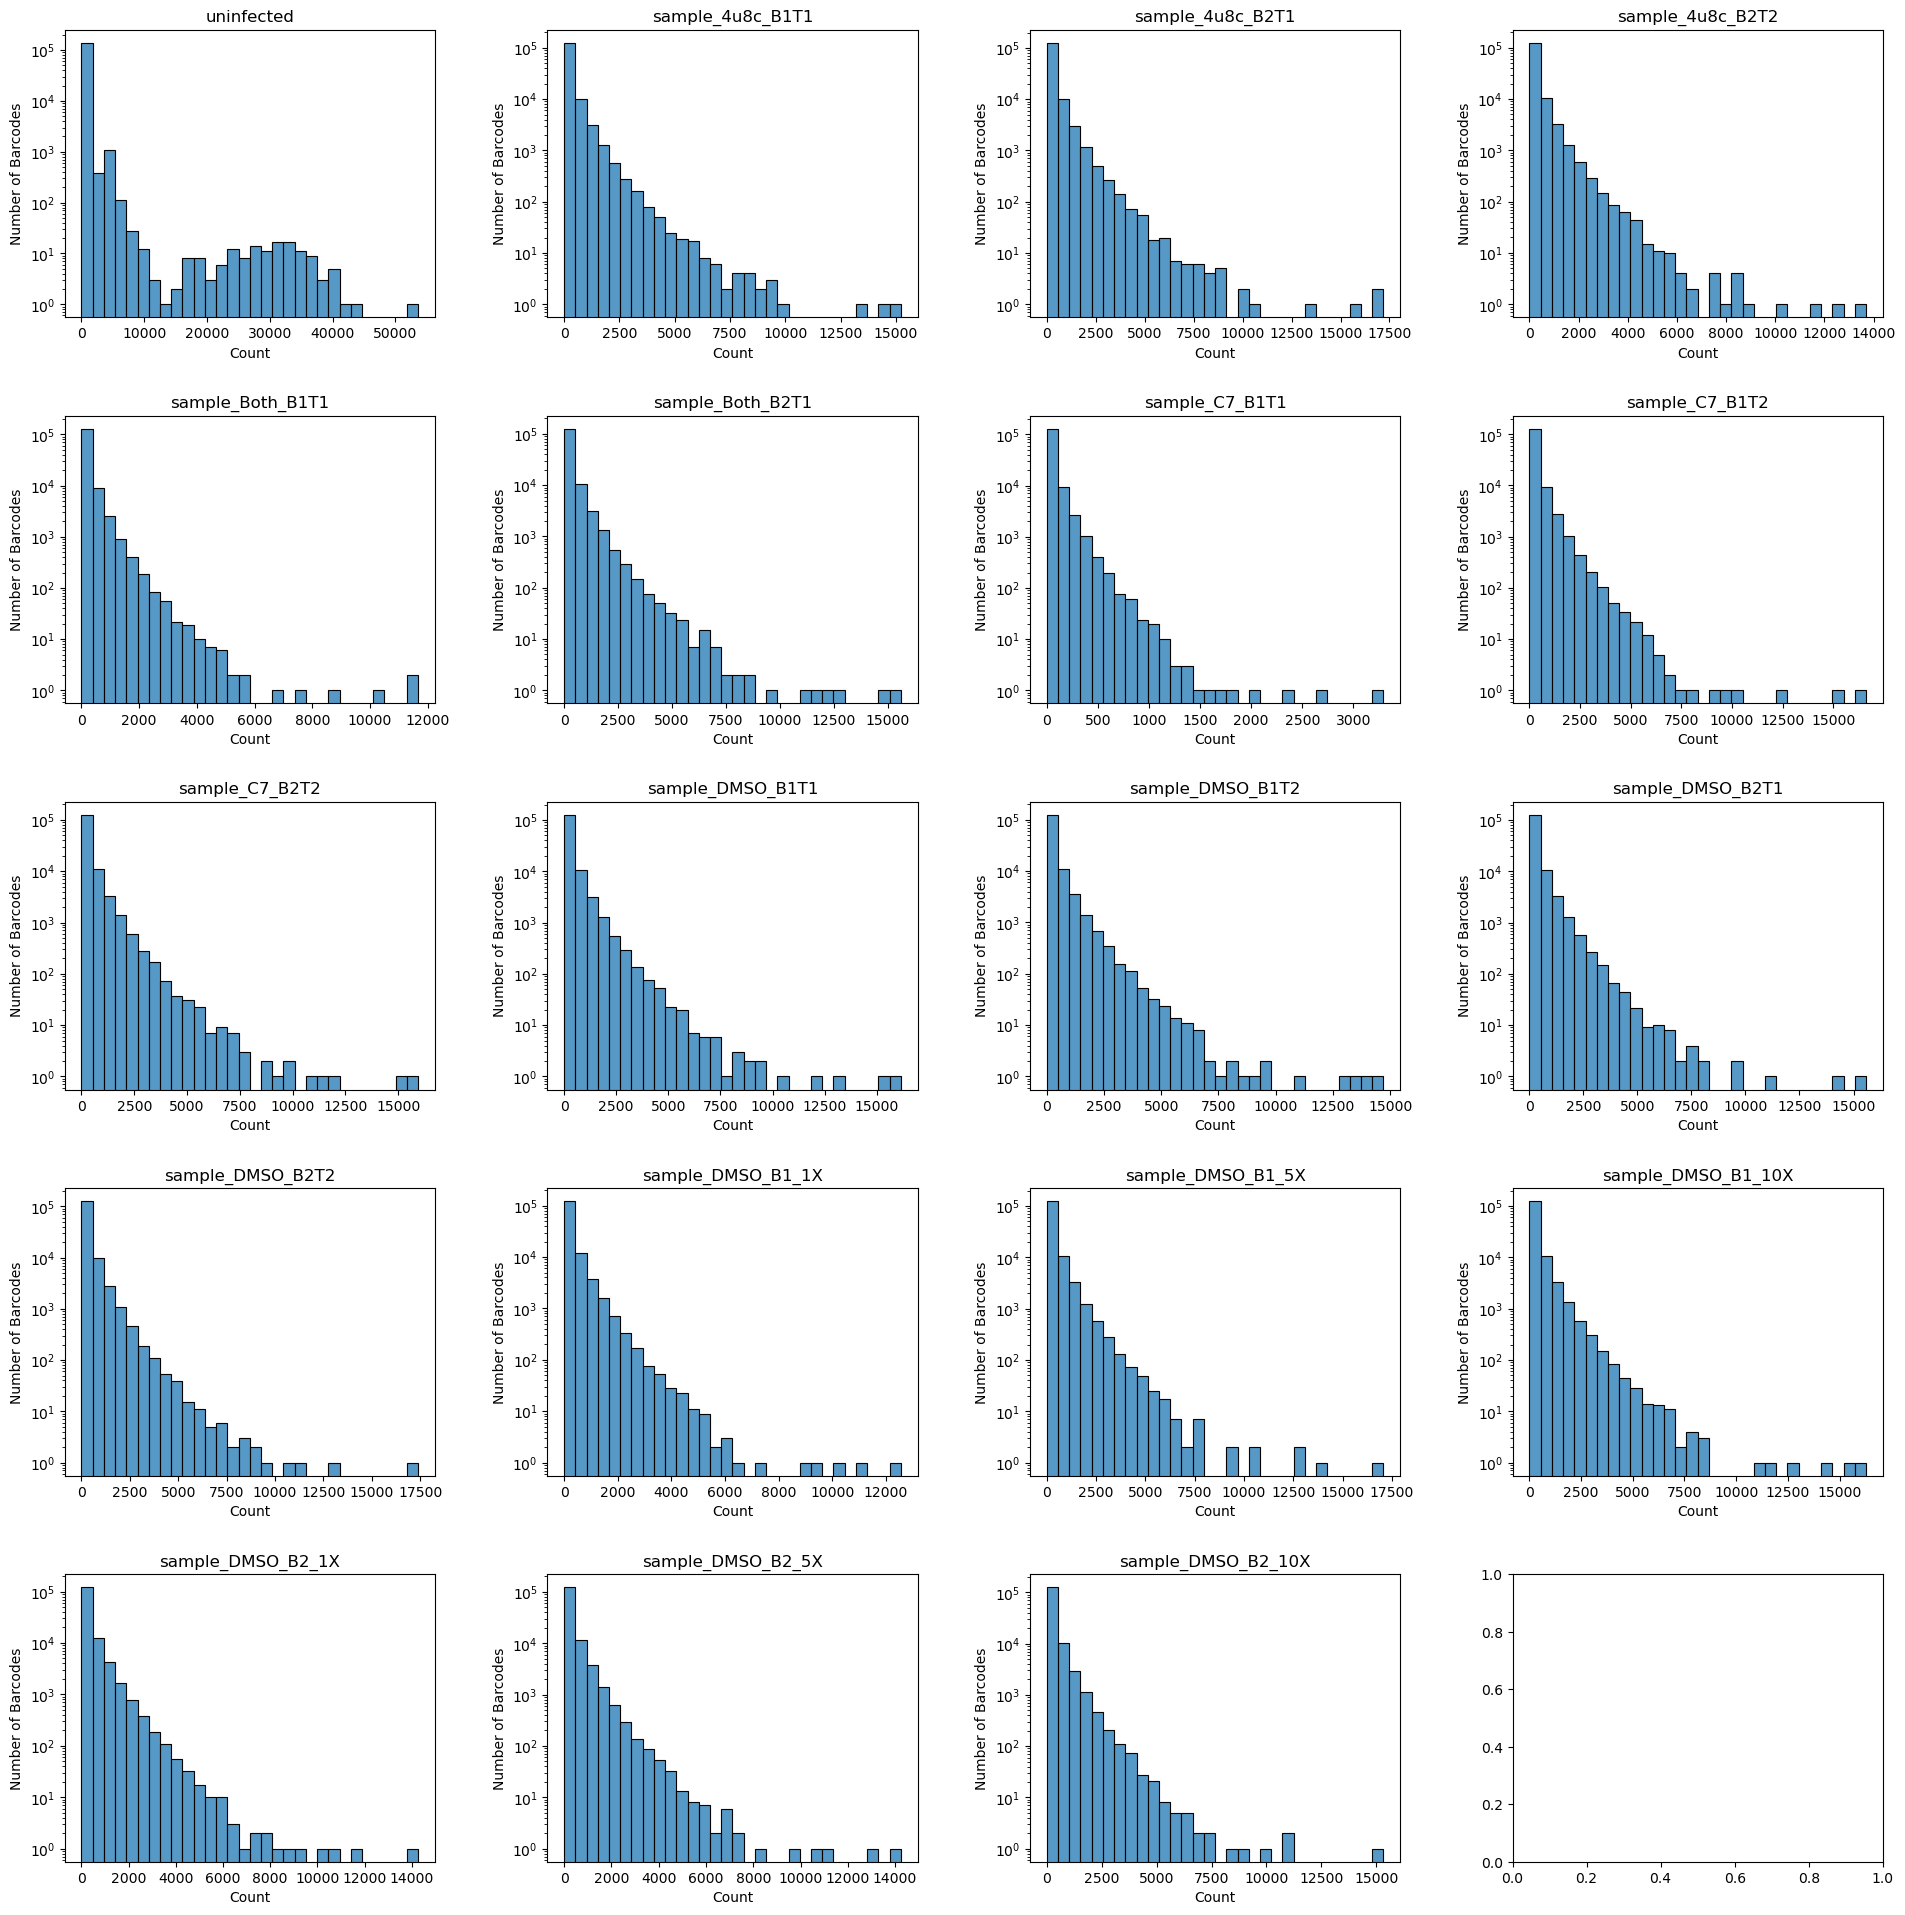

In [28]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # Adjust as necessary
fig.tight_layout(pad=5.0)

# Iterate over each dataframe name and create a histogram
for name, ax in zip(sample_names, axes.flatten()):
    df = globals()[name]  # Access the dataframe using its name
    sns.histplot(data=df, x='count', ax=ax, bins=30, kde=False, log=True)
    ax.set_title(name)
    ax.set_xlabel('Count')
    ax.set_ylabel('Number of Barcodes')

#plt.savefig('barcode_histograms_big_bins.png')
plt.show()

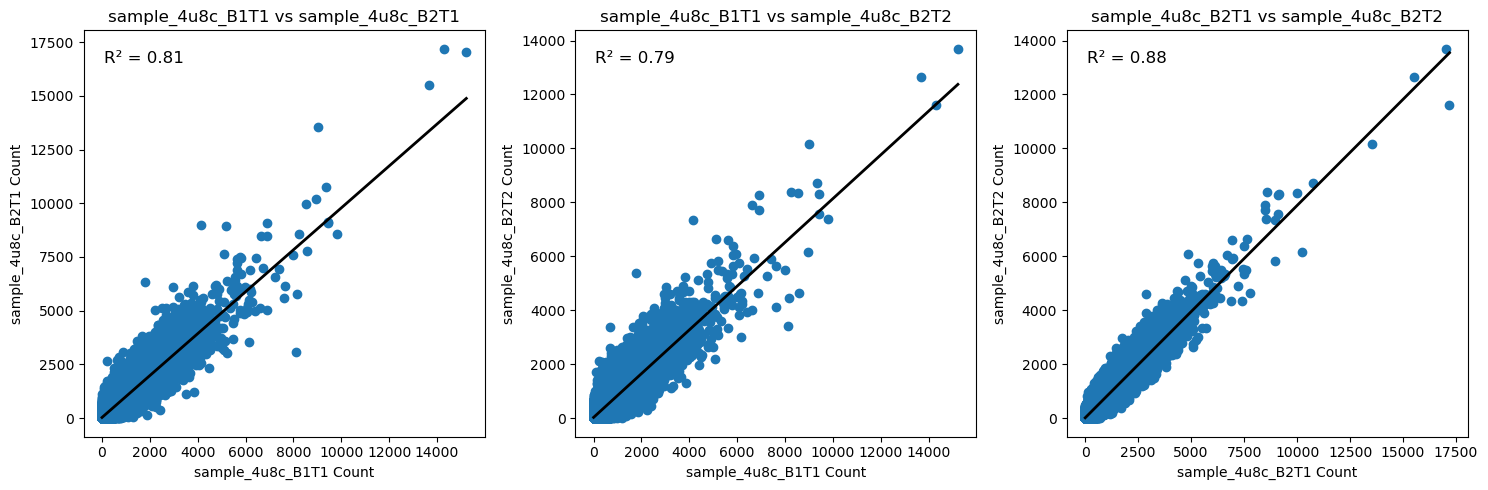

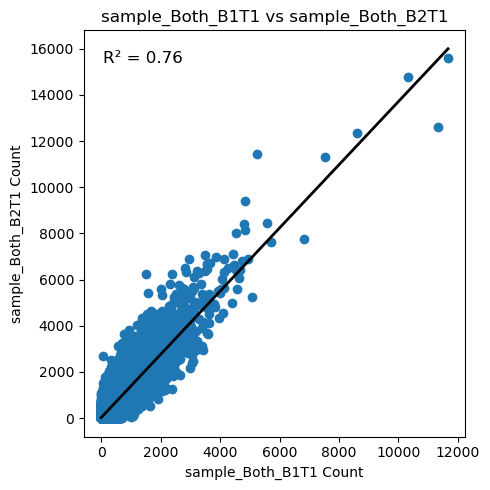

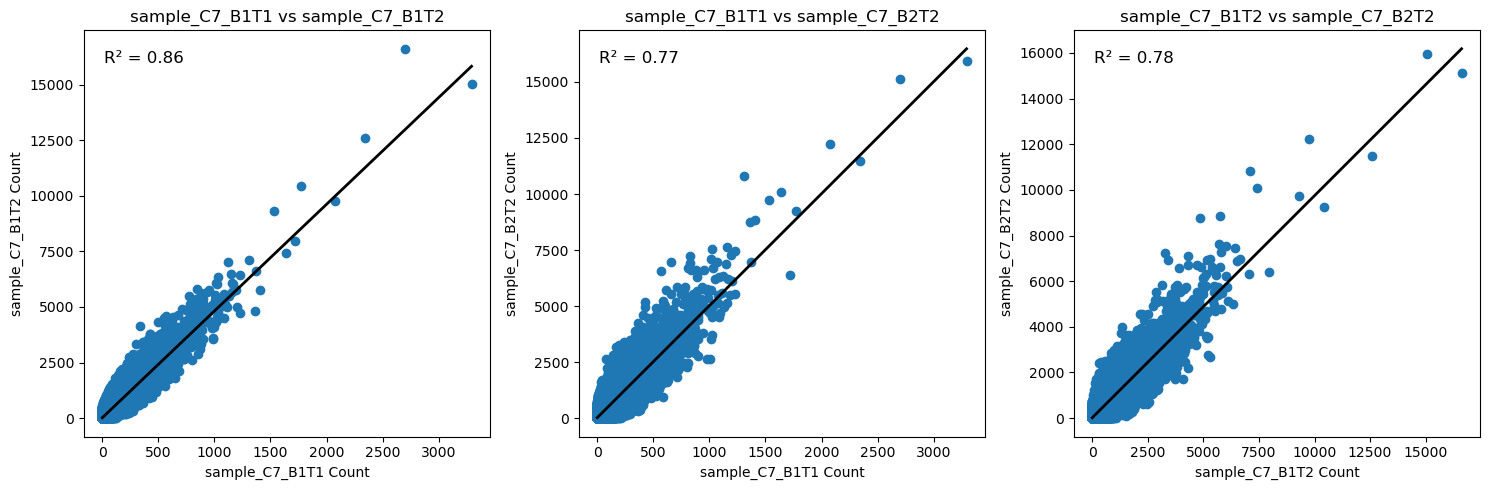

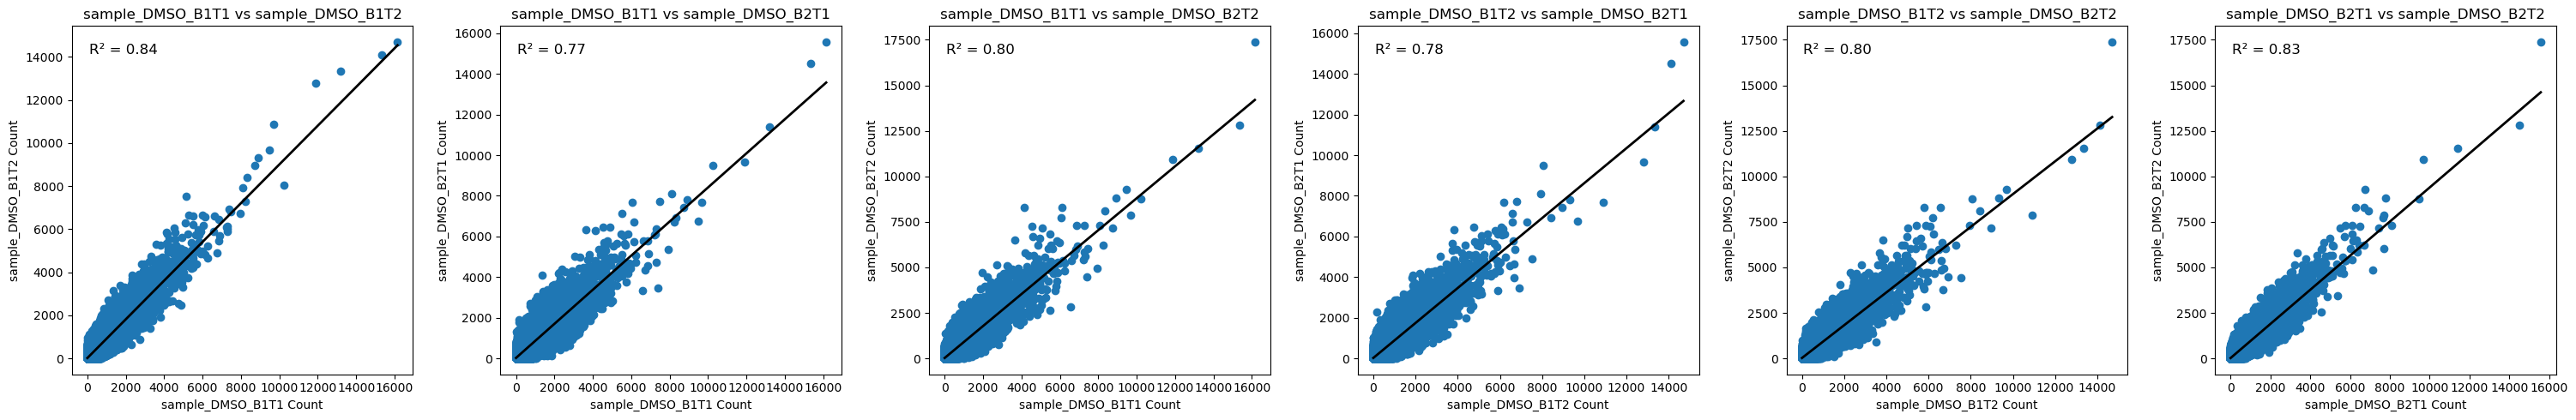

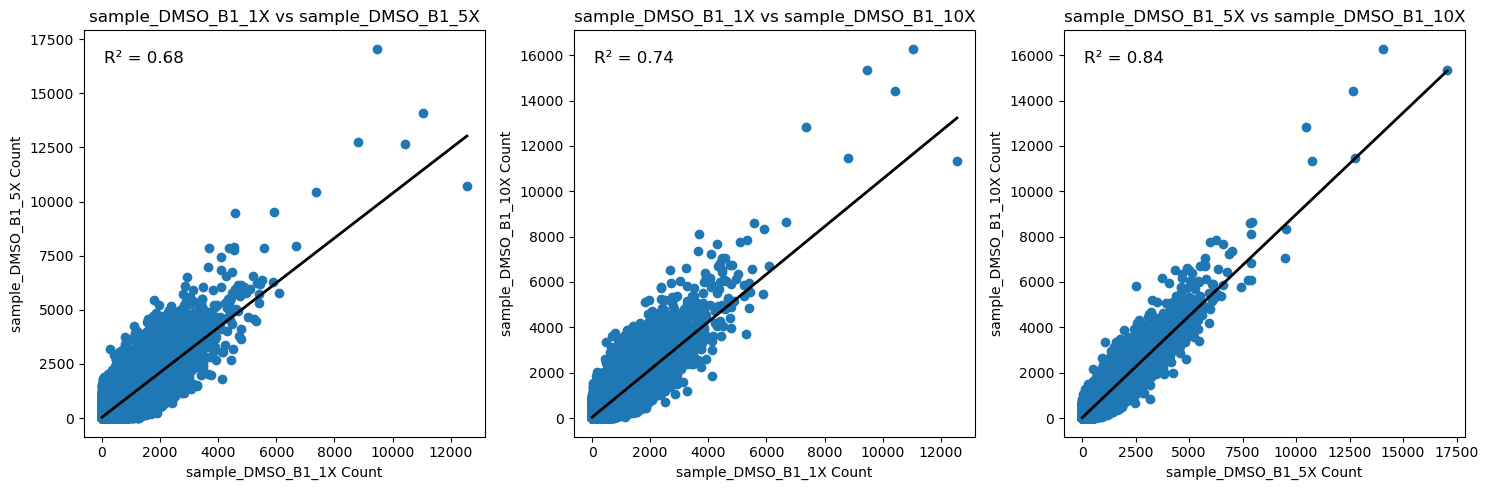

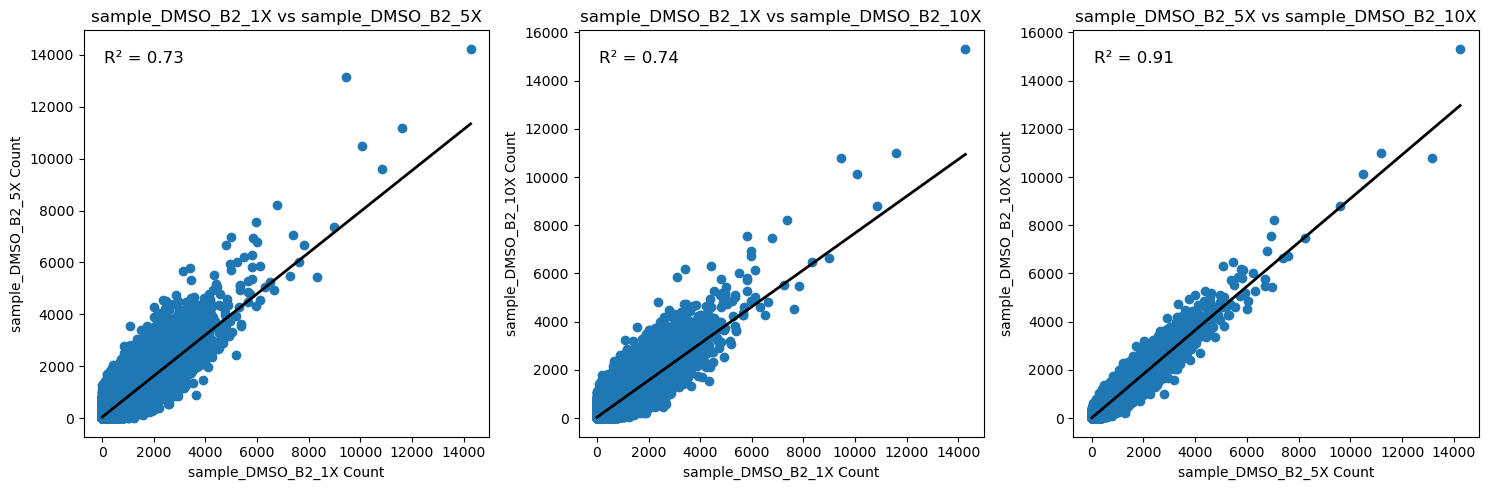

In [7]:
# Sample groups
sample_groups = [
    ("sample_4u8c_B1T1", "sample_4u8c_B2T1", "sample_4u8c_B2T2"),
    ("sample_Both_B1T1", "sample_Both_B2T1"),
    ("sample_C7_B1T1", "sample_C7_B1T2", "sample_C7_B2T2"),
    ("sample_DMSO_B1T1", "sample_DMSO_B1T2", "sample_DMSO_B2T1", "sample_DMSO_B2T2"),
    ("sample_DMSO_B1_1X", "sample_DMSO_B1_5X", "sample_DMSO_B1_10X"),
    ("sample_DMSO_B2_1X", "sample_DMSO_B2_5X", "sample_DMSO_B2_10X")
]

for group_index, group in enumerate(sample_groups):
    # Number of plots for the current group
    num_plots = len(group) * (len(group) - 1) // 2

    # Set up subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

    # Counter for the subplot index
    plot_index = 0

    # Iterate tchrough each pair of samples
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            # Merge the two dataframes on 'barcode'
            merged_df = pd.merge(globals()[group[i]], globals()[group[j]], on='barcode', suffixes=('_left', '_right'))

            # Plot
            ax = axes[plot_index] if num_plots > 1 else axes
            ax.scatter(merged_df['count_left'], merged_df['count_right'])
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_title(f'{group[i]} vs {group[j]}')
            
            # Perform linear regression
            X = sm.add_constant(merged_df['count_left'])
            Y = merged_df['count_right']
            model = sm.OLS(Y, X).fit()
            r_squared = model.rsquared
            predicted_values = model.predict(X)
            
            # Display R² value
            ax.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.plot(merged_df['count_left'], predicted_values, color='black', linewidth=2)

            plot_index += 1

    plt.tight_layout()
    plt.show()
    
    # Constructing a unique filename for each figure
    #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    #fig.savefig(filename, format='png')


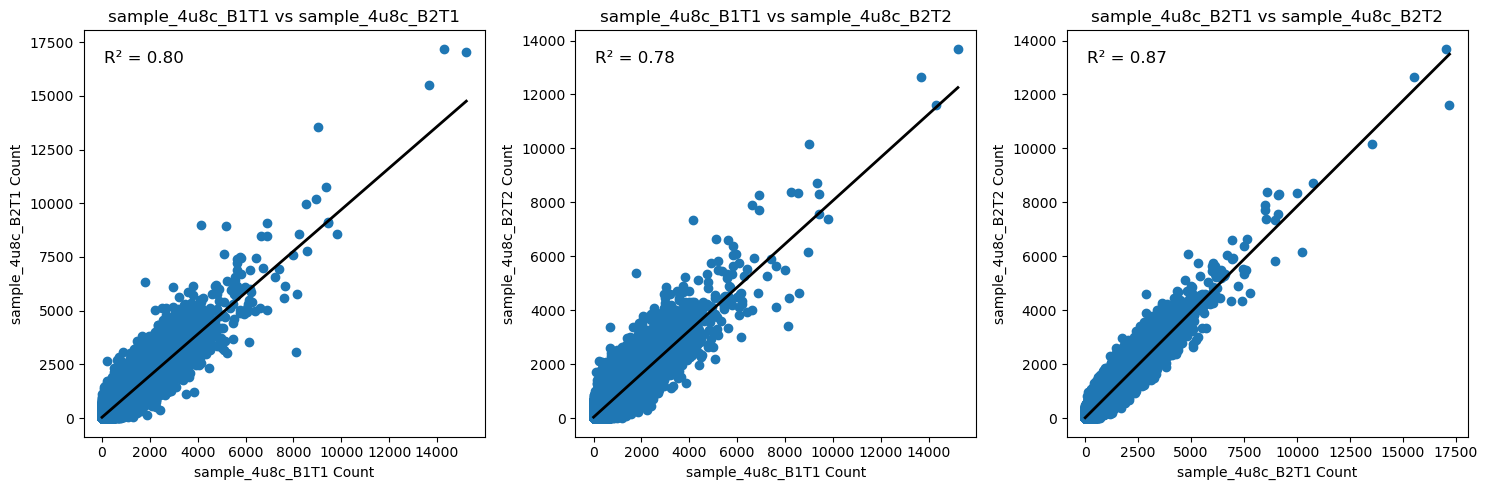

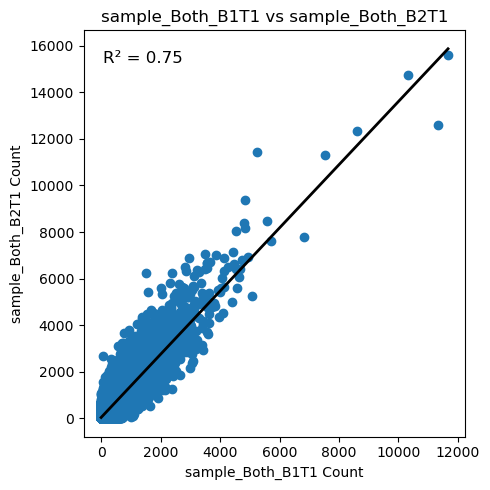

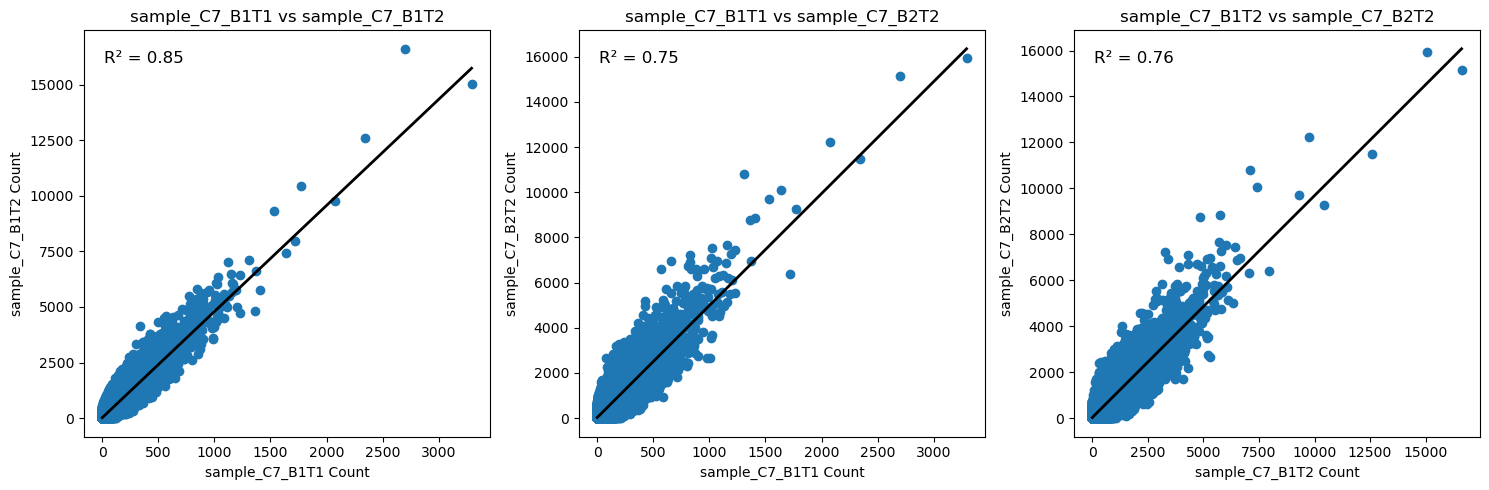

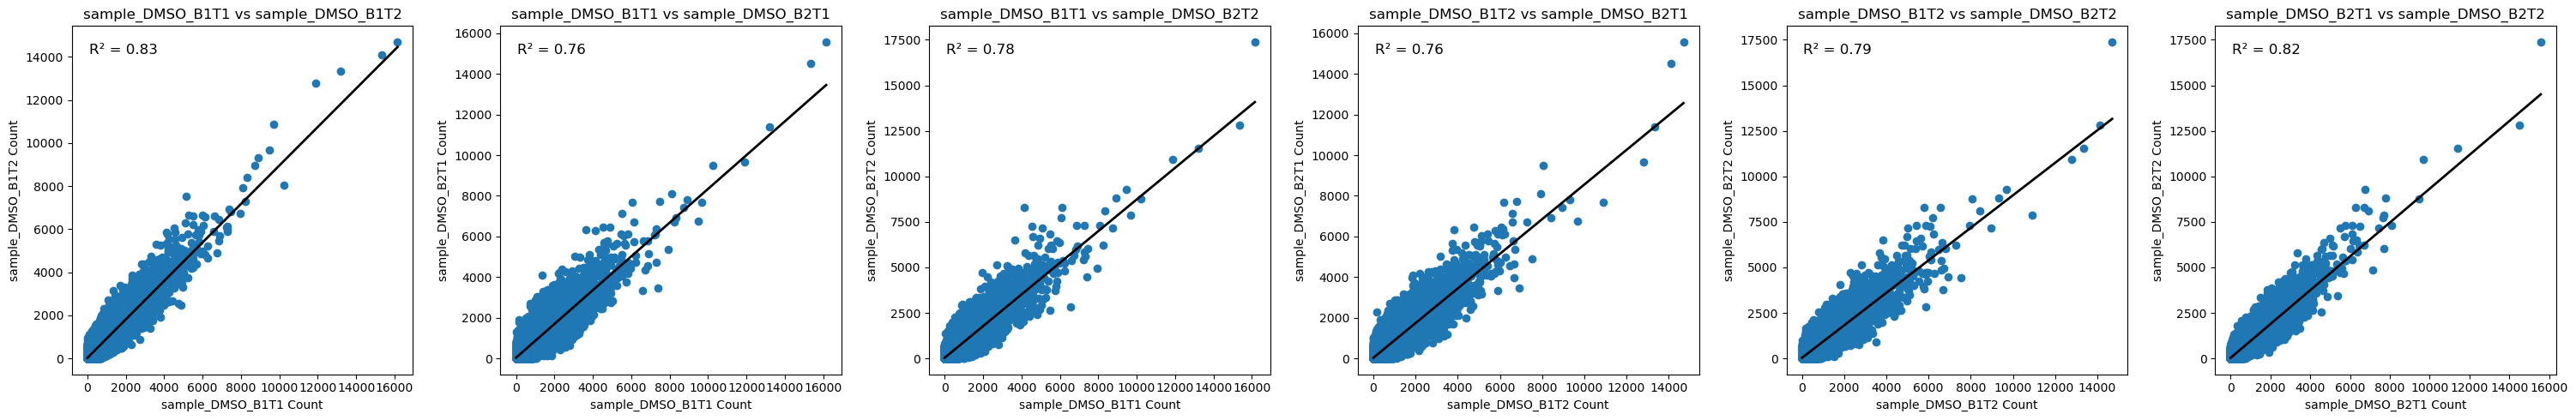

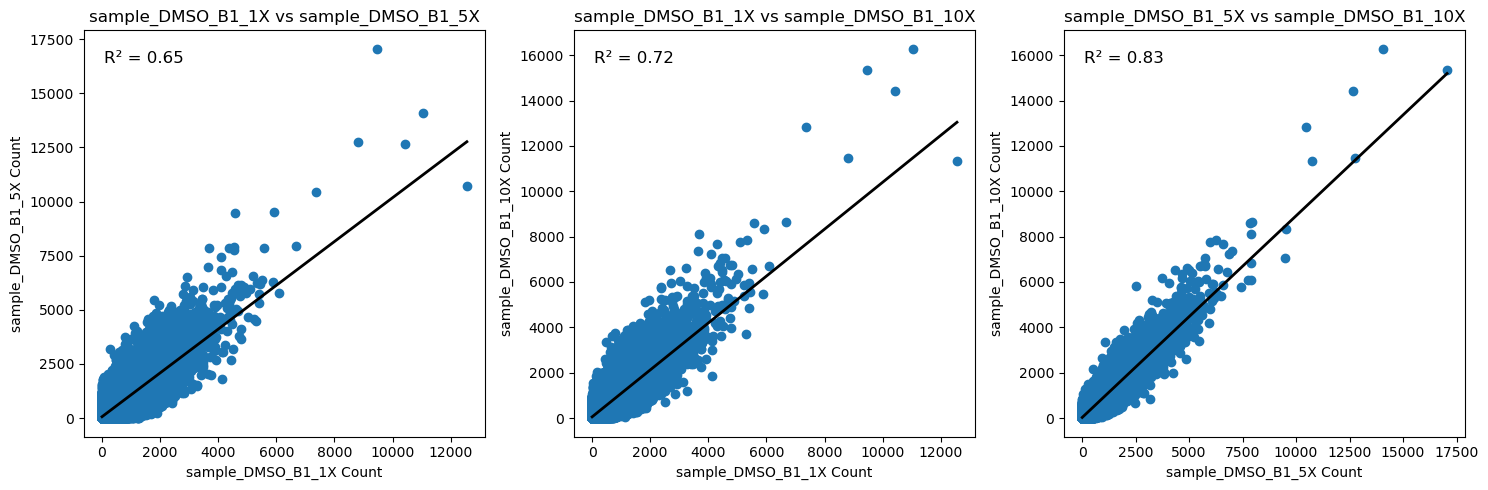

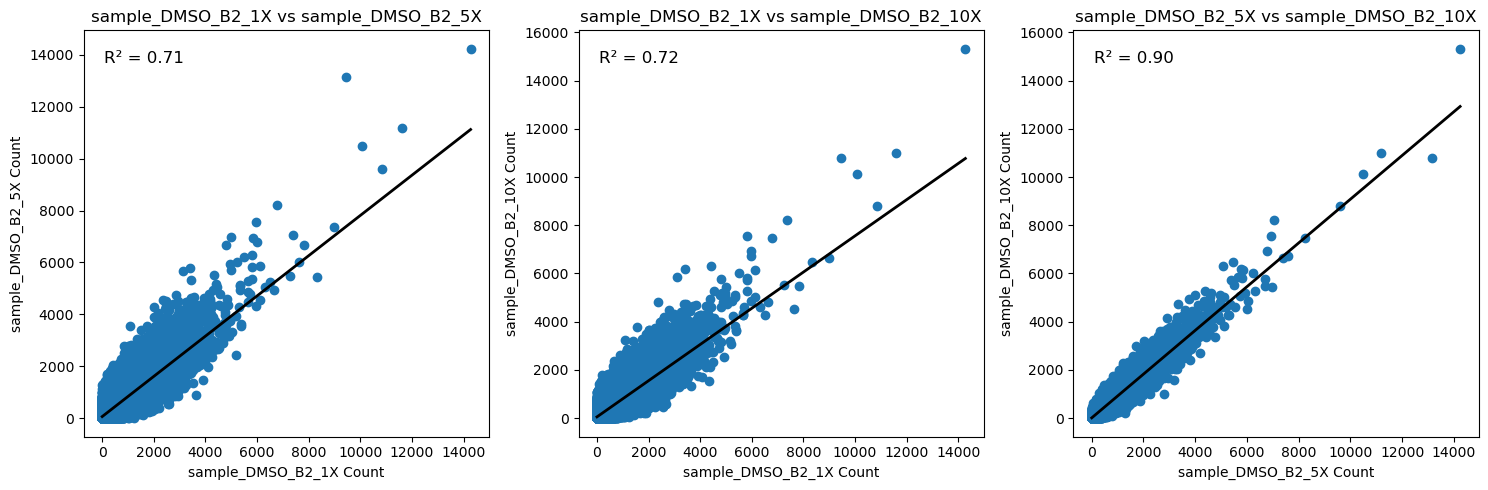

In [13]:
# Sample groups
sample_groups = [
    ("sample_4u8c_B1T1", "sample_4u8c_B2T1", "sample_4u8c_B2T2"),
    ("sample_Both_B1T1", "sample_Both_B2T1"),
    ("sample_C7_B1T1", "sample_C7_B1T2", "sample_C7_B2T2"),
    ("sample_DMSO_B1T1", "sample_DMSO_B1T2", "sample_DMSO_B2T1", "sample_DMSO_B2T2"),
    ("sample_DMSO_B1_1X", "sample_DMSO_B1_5X", "sample_DMSO_B1_10X"),
    ("sample_DMSO_B2_1X", "sample_DMSO_B2_5X", "sample_DMSO_B2_10X")
]

for group_index, group in enumerate(sample_groups):
    # Number of plots for the current group
    num_plots = len(group) * (len(group) - 1) // 2

    # Set up subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

    # Counter for the subplot index
    plot_index = 0

    # Iterate tchrough each pair of samples
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            # Merge the two dataframes on 'barcode'
            merged_df = pd.merge(globals()[group[i]], globals()[group[j]], on='barcode', suffixes=('_left', '_right'))
            
            #Drop rows when both samples have 0 barcodes
            merged_df = merged_df[~((merged_df['count_left'] == 0) & (merged_df['count_right'] == 0))]

            # Plot
            ax = axes[plot_index] if num_plots > 1 else axes
            ax.scatter(merged_df['count_left'], merged_df['count_right'])
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_title(f'{group[i]} vs {group[j]}')
            
            # Perform linear regression
            X = sm.add_constant(merged_df['count_left'])
            Y = merged_df['count_right']
            model = sm.OLS(Y, X).fit()
            r_squared = model.rsquared
            predicted_values = model.predict(X)
            
            # Display R² value
            ax.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            ax.plot(merged_df['count_left'], predicted_values, color='black', linewidth=2)

            plot_index += 1

    plt.tight_layout()
    plt.show()
    
    # Constructing a unique filename for each figure
    #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    #fig.savefig(filename, format='png')
